# Autour du SARS-CoV-2(Covid-19)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Sujet

Le but est de reproduire des graphes semblables à ceux du (South China Morning Post)[https://www.scmp.com/] (SCMP), sur la page (The Coronavirus Pandemic)[https://www.scmp.com/coronavirus?src=homepage_covid_widget] et qui montrent pour différents pays le nombre cumulé (c'est-à-dire le nombre total de cas depuis le début de l'épidémie) de personnes atteintes de la (maladie à coronavirus 2019)[https://fr.wikipedia.org/wiki/Maladie_%C3%A0_coronavirus_2019].

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
data

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
268            NaN             Vietnam  14.058324  108.277199        0   
269            NaN  West Bank and Gaza  31.952200   35.233200        0   
270            NaN               Yemen  15.552727   48.516388        0   
271            NaN              Zambia -13.133897   27.849332        0   
272            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  2/6/21  2/7/21  2/8/21  \
0          0        0        0        0        0  ...   55330   55335   55359   
1          0        0        0        0        0  ...   84212   85336   86289   
2          0        0        0        0        0  ...  108629  109088  109313   
3          0        0        0        0        0  ...   10206   10251   10275   
4          0        0        0        0        0  ...   20062   20086   20112   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
268        2        2        2        2        2  ...    1985    2001    2050   
269        0        0        0        0        0  ...  162029  162601  163213   
270        0        0        0        0        0  ...    2127    2127    2131   
271        0        0        0        0        0  ...   61427   62633   63573   
272        0        0        0        0        0  ...   34487   34552   34658   

     2/9/21  2/10/21  2/11/21  2/12/21  2/13/21  2/14/21  2/15/21  
0     55384    55402    55420    55445    55473    55492    55514  
1     87528    88671    89776    90835    91987    93075    93850  
2    109559   109782   110049   110303   110513   110711   110894  
3     10312    10352    10391    10427    10463    10503    10538  
4     20163    20210    20261    20294    20329    20366    20381  
..      ...      ...      ...      ...      ...      ...      ...  
268    2064     2091     2140     2142     2195     2228     2269  
269  163975   164736   165535   166200   166800   167604   168444  
270    2131     2133     2134     2136     2136     2145     2145  
271   64610    65573    66598    67681    68454    69437    70248  
272   34781    34864    34864    35045    35104    35172    35222  

[273 rows x 395 columns]

Les données que nous utiliserons dans un premier temps sont compilées par le (Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE))[https://systems.jhu.edu/] et sont mises à disposition sur (GitHub)[https://github.com/CSSEGISandData/COVID-19]. C'est plus particulièrement sur les données time_series_covid19_confirmed_global.csv (des suites chronologiques au format (csv)[https://fr.wikipedia.org/wiki/Comma-separated_values]) disponibles à l'adresse : https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv, que nous allons nous concentrer.

Seuls les pays suivants devront figurer dans l'exercice montrant l’évolution du nombre de cas cumulé au cours du temps :

* sélection des pays sans contraintes particulières.
    1) la Belgique (Belgium), 
    2) l’Allemagne (Germany), 
    3) l’Iran (Iran), 
    4) l’Italie (Italy), 
    5) le Japon (Japan), 
    6) la Corée du Sud (Korea, South), 
    7) le Portugal (Portugal), 
    8) l’Espagne (Spain),
    9) les États-Unis (US)

* traitement particulier pour les pays avec des territoires d'outre-mer et autres « résidus coloniaux » à soustraire.
    10) la France métropolitaine (France),
    11) la Hollande sans les colonies (Netherlands), 
    12) le Royaume-Unis (United Kingdom)

* traitement particulier pour les provinces chinoises (Pour le besoin de l'exercice, nous devons séparer *Hong-Kong*, non pour prendre parti dans les différences entre cette province et l'état chinois, mais parce que c'est ainsi qu'apparaissent les données sur le site du SCMP).
    13) la Chine - toutes les provinces sauf Hong-Kong (China), 
    14) Hong Kong (China, Hong-Kong)

Nous devons donc isoler notre sélection sur ces 14 pays/régions. Le nom entre parenthèses est le nom du « pays » tel qu’il apparaît dans le fichier utilisé `time_series_covid19_confirmed_global.csv.`

## la sélection des 9 pays sans contraintes.

In [3]:
data_selection1 = data[data["Country/Region"].isin(["Belgium", "Germany", "Iran",  "Italy", "Japan",  "Korea, South", "Portugal", "Spain", "US"])]
data_selection2 = data_selection1[data_selection1["Province/State"].isna()]
data_selection3 = data_selection2.groupby('Country/Region').sum()
data_selection3.copy()

Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                              
Belgium         50.833300    4.469936        0        0        0        0   
Germany         51.165691   10.451526        0        0        0        0   
Iran            32.427908   53.688046        0        0        0        0   
Italy           41.871940   12.567380        0        0        0        0   
Japan           36.204824  138.252924        2        2        2        2   
Korea, South    35.907757  127.766922        1        1        2        2   
Portugal        39.399900   -8.224500        0        0        0        0   
Spain           40.463667   -3.749220        0        0        0        0   
US              40.000000 -100.000000        1        1        2        2   

                1/26/20  1/27/20  1/28/20  1/29/20  ...    2/6/21    2/7/21  \
Country/Region                                      ...                       
Belgium               0        0        0        0  ...    723870    725610   
Germany               0        1        4        4  ...   2285003   2291673   
Iran                  0        0        0        0  ...   1459370   1466435   
Italy                 0        0        0        0  ...   2625098   2636738   
Japan                 4        4        7        7  ...    404128    405765   
Korea, South          3        4        4        4  ...     80896     81185   
Portugal              0        0        0        0  ...    761906    765414   
Spain                 0        0        0        0  ...   2941990   2941990   
US                    5        5        5        6  ...  26917787  27007368   

                  2/8/21    2/9/21   2/10/21   2/11/21   2/12/21   2/13/21  \
Country/Region                                                               
Belgium           726483    728334    730951    733100    735220    737115   
Germany          2296323   2302051   2311297   2321225   2330422   2336906   
Iran             1473756   1481396   1488981   1496455   1503753   1510873   
Italy            2644707   2655319   2668266   2683403   2697296   2710819   
Japan             406992    408550    410434    412125    413441    414803   
Korea, South       81487     81930     82434     82837     83199     83525   
Portugal          767919    770502    774889    778369    781223    784079   
Spain            2989085   3005487   3023601   3041454   3056035   3056035   
US              27097095  27192455  27287159  27392512  27492023  27575344   

                 2/14/21   2/15/21  
Country/Region                      
Belgium           738631    739488  
Germany          2341744   2346876  
Iran             1518263   1526023  
Italy            2721879   2729223  
Japan             416154    417127  
Korea, South       83869     84325  
Portugal          785756    787059  
Spain            3056035   3086286  
US              27640282  27694165  

[9 rows x 393 columns]

## les pays avec des territoires d'outre-mer et autres « résidus coloniaux ».

In [4]:
data_selection4 = data[data["Country/Region"].isin(["France", "Netherlands »", "United Kingdom"])]
data_selection4

Province/State  Country/Region        Lat        Long  \
118                French Guiana          France   3.933900  -53.125800   
119             French Polynesia          France -17.679700  149.406800   
120                   Guadeloupe          France  16.265000  -61.551000   
121                   Martinique          France  14.641500  -61.024200   
122                      Mayotte          France -12.827500   45.166244   
123                New Caledonia          France -20.904305  165.618042   
124                      Reunion          France -21.115100   55.536400   
125             Saint Barthelemy          France  17.900000  -62.833300   
126    Saint Pierre and Miquelon          France  46.885200  -56.315900   
127                    St Martin          France  18.070800  -63.050100   
128            Wallis and Futuna          France -14.293800 -178.116500   
129                          NaN          France  46.227600    2.213700   
253                     Anguilla  United Kingdom  18.220600  -63.068600   
254                      Bermuda  United Kingdom  32.307800  -64.750500   
255       British Virgin Islands  United Kingdom  18.420700  -64.640000   
256               Cayman Islands  United Kingdom  19.313300  -81.254600   
257              Channel Islands  United Kingdom  49.372300   -2.364400   
258  Falkland Islands (Malvinas)  United Kingdom -51.796300  -59.523600   
259                    Gibraltar  United Kingdom  36.140800   -5.353600   
260                  Isle of Man  United Kingdom  54.236100   -4.548100   
261                   Montserrat  United Kingdom  16.742498  -62.187366   
262     Turks and Caicos Islands  United Kingdom  21.694000  -71.797900   
263                          NaN  United Kingdom  55.378100   -3.436000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...   2/6/21  \
118        0        0        0        0        0        0  ...    16296   
119        0        0        0        0        0        0  ...    18185   
120        0        0        0        0        0        0  ...     9156   
121        0        0        0        0        0        0  ...     6442   
122        0        0        0        0        0        0  ...    10755   
123        0        0        0        0        0        0  ...       49   
124        0        0        0        0        0        0  ...    10487   
125        0        0        0        0        0        0  ...      360   
126        0        0        0        0        0        0  ...       24   
127        0        0        0        0        0        0  ...     1234   
128        0        0        0        0        0        0  ...        5   
129        0        0        2        3        3        3  ...  3303273   
253        0        0        0        0        0        0  ...       17   
254        0        0        0        0        0        0  ...      692   
255        0        0        0        0        0        0  ...      114   
256        0        0        0        0        0        0  ...      405   
257        0        0        0        0        0        0  ...     3885   
258        0        0        0        0        0        0  ...       45   
259        0        0        0        0        0        0  ...     4177   
260        0        0        0        0        0        0  ...      434   
261        0        0        0        0        0        0  ...       15   
262        0        0        0        0        0        0  ...     1654   
263        0        0        0        0        0        0  ...  3929835   

      2/7/21   2/8/21   2/9/21  2/10/21  2/11/21  2/12/21  2/13/21  2/14/21  \
118    16296    16296    16296    16296    16296    16296    16456    16456   
119    18185    18206    18222    18244    18257    18263    18263    18263   
120     9156     9156     9302     9302     9302     9302     9302     9302   
121     6442     6442     6521     6521     6521     6521     6521     6521   
122    10755    10755

L'opération de regroupement des données avec les territoires d'outre-mer et les « résidus coloniaux » modifie **la latitude et la longitude** des pays à étudier.
Afin de préserver une exploitation future sur les territoires, il sera modifié la coordonnées des trois pays avec 
* pour la France : Lat(46.227600)-Long(2.213700) - **index 129**
* pour la Hollande (Netherlands) : Lat(52.132600)-Long(5.291300) - **index 194**
* pour le Royaume Unis (United Kingdom) : Lat(55.378100)-Long(-3.436000) - **index 262**

### 10ème pays : la France

In [5]:
data_selection4 = data[data["Country/Region"].isin(["France"])]
data_selection5 = data_selection4[data_selection4["Province/State"].isna()]
data_selection5 = data_selection4.groupby('Country/Region').sum()
data_selection5

Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                              
France          77.103595 -118.075614        0        0        2        3   

                1/26/20  1/27/20  1/28/20  1/29/20  ...   2/6/21   2/7/21  \
Country/Region                                      ...                     
France                3        3        4        5  ...  3376266  3395981   

                 2/8/21   2/9/21  2/10/21  2/11/21  2/12/21  2/13/21  2/14/21  \
Country/Region                                                                  
France          3400324  3419210  3444888  3465964  3466629  3467051  3467884   

                2/15/21  
Country/Region           
France          3528856  

[1 rows x 393 columns]

In [6]:
data_selection5.loc[:, 'Lat'] =46.227600
data_selection5.loc[:, 'Long'] =2.213700
data_selection5.copy()

Lat    Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Country/Region                                                                 
France          46.2276  2.2137        0        0        2        3        3   

                1/27/20  1/28/20  1/29/20  ...   2/6/21   2/7/21   2/8/21  \
Country/Region                             ...                              
France                3        4        5  ...  3376266  3395981  3400324   

                 2/9/21  2/10/21  2/11/21  2/12/21  2/13/21  2/14/21  2/15/21  
Country/Region                                                                 
France          3419210  3444888  3465964  3466629  3467051  3467884  3528856  

[1 rows x 393 columns]

### 11ème pays : la Hollande

In [7]:
data_selection6 = data[data["Country/Region"].isin(["Netherlands"])]
data_selection7 = data_selection6[data_selection6["Province/State"].isna()]
data_selection7 = data_selection6.groupby('Country/Region').sum()
data_selection7

Lat      Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                           
Netherlands     107.0442 -264.9603        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...   2/6/21   2/7/21  \
Country/Region                                      ...                     
Netherlands           0        0        0        0  ...  1015757  1019720   

                 2/8/21   2/9/21  2/10/21  2/11/21  2/12/21  2/13/21  2/14/21  \
Country/Region                                                                  
Netherlands     1021966  1023779  1027023  1031454  1035841  1040070  1043541   

                2/15/21  
Country/Region           
Netherlands     1046381  

[1 rows x 393 columns]

In [8]:
data_selection7.loc[:, 'Lat'] =55.378100
data_selection7.loc[:, 'Long'] =5.291300
data_selection7.copy()

Lat    Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Country/Region                                                                 
Netherlands     55.3781  5.2913        0        0        0        0        0   

                1/27/20  1/28/20  1/29/20  ...   2/6/21   2/7/21   2/8/21  \
Country/Region                             ...                              
Netherlands           0        0        0  ...  1015757  1019720  1021966   

                 2/9/21  2/10/21  2/11/21  2/12/21  2/13/21  2/14/21  2/15/21  
Country/Region                                                                 
Netherlands     1023779  1027023  1031454  1035841  1040070  1043541  1046381  

[1 rows x 393 columns]

### 12ème pays : le Royaume Unis

In [9]:
data_selection8 = data[data["Country/Region"].isin(["United Kingdom"])]
data_selection8
data_selection9 = data_selection8[data_selection8["Province/State"].isna()]
data_selection9 = data_selection8.groupby('Country/Region').sum()
data_selection9.copy()

Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                               
United Kingdom  270.029898 -482.924666        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...   2/6/21   2/7/21  \
Country/Region                                      ...                     
United Kingdom        0        0        0        0  ...  3941273  3957177   

                 2/8/21   2/9/21  2/10/21  2/11/21  2/12/21  2/13/21  2/14/21  \
Country/Region                                                                  
United Kingdom  3971315  3983756  3996833  4010376  4025574  4038929  4049920   

                2/15/21  
Country/Region           
United Kingdom  4059696  

[1 rows x 393 columns]

In [10]:
data_selection9.loc[:, 'Lat'] =52.132600
data_selection9.loc[:, 'Long'] =3.436000
data_selection9.copy()

Lat   Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Country/Region                                                                
United Kingdom  52.1326  3.436        0        0        0        0        0   

                1/27/20  1/28/20  1/29/20  ...   2/6/21   2/7/21   2/8/21  \
Country/Region                             ...                              
United Kingdom        0        0        0  ...  3941273  3957177  3971315   

                 2/9/21  2/10/21  2/11/21  2/12/21  2/13/21  2/14/21  2/15/21  
Country/Region                                                                 
United Kingdom  3983756  3996833  4010376  4025574  4038929  4049920  4059696  

[1 rows x 393 columns]

## la chine, ses provinces dont Hong Kong
Pour répondre à l'exercice, nous devons cumuler les résultats des provinces de la Chine sans la région de Hong Kong qui doit être isolée.

### 13ème "pays" : Hong Kong

In [11]:
data_Hong_Kong = data[data["Province/State"].isin(["Hong Kong"])]
data_Hong_Kong2 =data_Hong_Kong.groupby('Country/Region').sum()
data_Hong_Kong2

Lat   Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Country/Region                                                             
China           22.3  114.2        0        2        2        5        8   

                1/27/20  1/28/20  1/29/20  ...  2/6/21  2/7/21  2/8/21  \
Country/Region                             ...                           
China                 8        8       10  ...   10608   10635   10667   

                2/9/21  2/10/21  2/11/21  2/12/21  2/13/21  2/14/21  2/15/21  
Country/Region                                                                
China            10693    10710    10731    10755    10767    10779    10788  

[1 rows x 393 columns]

modification de l'index China (Country/Region) en celui de Hong Kong (Province/State) correspondant au regroupement.

In [53]:
data_Hong_Kong2.rename({"China":"Hong Kong"},inplace=True)

In [54]:
data_Hong_Kong3 = data_Hong_Kong2.copy()
data_Hong_Kong3

Lat   Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Hong_Kong                                                                      
Hong Kong  22.3  114.2        0        2        2        5        8        8   

           1/28/20  1/29/20  ...  2/6/21  2/7/21  2/8/21  2/9/21  2/10/21  \
Hong_Kong                    ...                                            
Hong Kong        8       10  ...   10608   10635   10667   10693    10710   

           2/11/21  2/12/21  2/13/21  2/14/21  2/15/21  
Hong_Kong                                               
Hong Kong    10731    10755    10767    10779    10788  

[1 rows x 393 columns]

### 14ème pays : la Chine

33 provinces sont répertoriées pour la Chine dans cette extraction avec la province de Hong Kong

In [14]:
data_selection10 = data[data["Country/Region"].isin(["China"])]
data_selection10

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
58           Anhui          China  31.8257  117.2264        1        9   
59         Beijing          China  40.1824  116.4142       14       22   
60       Chongqing          China  30.0572  107.8740        6        9   
61          Fujian          China  26.0789  117.9874        1        5   
62           Gansu          China  35.7518  104.2861        0        2   
63       Guangdong          China  23.3417  113.4244       26       32   
64         Guangxi          China  23.8298  108.7881        2        5   
65         Guizhou          China  26.8154  106.8748        1        3   
66          Hainan          China  19.1959  109.7453        4        5   
67           Hebei          China  39.5490  116.1306        1        1   
68    Heilongjiang          China  47.8620  127.7615        0        2   
69           Henan          China  37.8957  114.9042        5        5   
70       Hong Kong          China  22.3000  114.2000        0        2   
71           Hubei          China  30.9756  112.2707      444      444   
72           Hunan          China  27.6104  111.7088        4        9   
73  Inner Mongolia          China  44.0935  113.9448        0        0   
74         Jiangsu          China  32.9711  119.4550        1        5   
75         Jiangxi          China  27.6140  115.7221        2        7   
76           Jilin          China  43.6661  126.1923        0        1   
77        Liaoning          China  41.2956  122.6085        2        3   
78           Macau          China  22.1667  113.5500        1        2   
79         Ningxia          China  37.2692  106.1655        1        1   
80         Qinghai          China  35.7452   95.9956        0        0   
81         Shaanxi          China  35.1917  108.8701        0        3   
82        Shandong          China  36.3427  118.1498        2        6   
83        Shanghai          China  31.2020  121.4491        9       16   
84          Shanxi          China  37.5777  112.2922        1        1   
85         Sichuan          China  30.6171  102.7103        5        8   
86         Tianjin          China  39.3054  117.3230        4        4   
87           Tibet          China  31.6927   88.0924        0        0   
88        Xinjiang          China  41.1129   85.2401        0        2   
89          Yunnan          China  24.9740  101.4870        1        2   
90        Zhejiang          China  29.1832  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  2/6/21  2/7/21  2/8/21  2/9/21  \
58       15       39       60       70  ...     994     994     994     994   
59       36       41       68       80  ...    1046    1046    1046    1046   
60       27       57       75      110  ...     591     591     591     591   
61       10       18       35       59  ...     545     545     546     547   
62        2        4        7       14  ...     187     187     187     187   
63       53       78      111      151  ...    2137    2144    2151    2151   
64       23       23       36       46  ...     267     267     267     267   
65        3        4        5        7  ...     147     147     147     147   
66        8       19       22       33  ...     171     171     171     171   
67        2        8       13       18  ...    1316    1316    1316    1316   
68        4        9       15       21  ...    1609    1609    1609    1609   
69        9       32       83      128  ...    1303    1303    1303    1303   
70        2        5        8        8  ...   10608   10635   10667   10693   
71      549      761     1058     1423  ...   68150   68150   68150   68150   
72       24       43       69      100  ...    1033    1033    1033    1033   
73        1        7        7       11  ...     366     366     366     366   
74        9       18       33       47  ...     701     701     702     703   
75       18       18       36       72  ...     935     935     9

La province de Hong Kong qui fait l'objet d'une sélection indépendante est soustraite de la somme des provinces en réutilisant **l'index (numéro 70)** sur la liste ci-dessus)

In [15]:
data_selection10[~data_selection10.index.isin([70])]
data_selection11 = data_selection10.groupby('Country/Region').sum()
data_selection11 

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                             
China           1085.2923  3688.9377      548      643      920     1406   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  2/6/21  2/7/21  \
Country/Region                                      ...                   
China              2075     2877     5509     6087  ...  100348  100389   

                2/8/21  2/9/21  2/10/21  2/11/21  2/12/21  2/13/21  2/14/21  \
Country/Region                                                                
China           100435  100475   100494   100527   100559   100578   100599   

                2/15/21  
Country/Region           
China            100624  

[1 rows x 393 columns]

Le résultat cumulé des colonnes sur l'infection journalière au SARS-COVID19 de l'ensemble des provinces présente des coordonnées non valides pour la latitude(Lat) et la longitude (Long) du pays. En prévison de graphiques sectoriels, je propose d'assigner la position du centre relatif de la Chine au niveau de la province d'**Hubei** Lat-30.9756  Long-1122707.
https://fr.wikipedia.org/wiki/P%C3%A9kin#/media/Fichier:RP_Chine_administrative2.jpg

In [16]:
data_selection11.loc[:, 'Lat'] =30.9756
data_selection11.loc[:, 'Long'] =112.2707
data_selection11.copy()

Lat      Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                          
China           30.9756  112.2707      548      643      920     1406   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  2/6/21  2/7/21  \
Country/Region                                      ...                   
China              2075     2877     5509     6087  ...  100348  100389   

                2/8/21  2/9/21  2/10/21  2/11/21  2/12/21  2/13/21  2/14/21  \
Country/Region                                                                
China           100435  100475   100494   100527   100559   100578   100599   

                2/15/21  
Country/Region           
China            100624  

[1 rows x 393 columns]

## les 14 pays ou territoires à représenter

In [55]:
data_selection12=data_selection3.append(data_Hong_Kong2)
data_selection13=data_selection12.append(data_selection5)
data_selection14=data_selection13.append(data_selection7)
data_selection15=data_selection14.append(data_selection9)
data_selection16=data_selection15.append(data_selection11)
data_selection16

Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Belgium         50.833300    4.469936        0        0        0        0   
Germany         51.165691   10.451526        0        0        0        0   
Iran            32.427908   53.688046        0        0        0        0   
Italy           41.871940   12.567380        0        0        0        0   
Japan           36.204824  138.252924        2        2        2        2   
Korea, South    35.907757  127.766922        1        1        2        2   
Portugal        39.399900   -8.224500        0        0        0        0   
Spain           40.463667   -3.749220        0        0        0        0   
US              40.000000 -100.000000        1        1        2        2   
Hong Kong       22.300000  114.200000        0        2        2        5   
France          46.227600    2.213700        0        0        2        3   
Netherlands     55.378100    5.291300        0        0        0        0   
United Kingdom  52.132600    3.436000        0        0        0        0   
China           30.975600  112.270700      548      643      920     1406   

                1/26/20  1/27/20  1/28/20  1/29/20  ...    2/6/21    2/7/21  \
Belgium               0        0        0        0  ...    723870    725610   
Germany               0        1        4        4  ...   2285003   2291673   
Iran                  0        0        0        0  ...   1459370   1466435   
Italy                 0        0        0        0  ...   2625098   2636738   
Japan                 4        4        7        7  ...    404128    405765   
Korea, South          3        4        4        4  ...     80896     81185   
Portugal              0        0        0        0  ...    761906    765414   
Spain                 0        0        0        0  ...   2941990   2941990   
US                    5        5        5        6  ...  26917787  27007368   
Hong Kong             8        8        8       10  ...     10608     10635   
France                3        3        4        5  ...   3376266   3395981   
Netherlands           0        0        0        0  ...   1015757   1019720   
United Kingdom        0        0        0        0  ...   3941273   3957177   
China              2075     2877     5509     6087  ...    100348    100389   

                  2/8/21    2/9/21   2/10/21   2/11/21   2/12/21   2/13/21  \
Belgium           726483    728334    730951    733100    735220    737115   
Germany          2296323   2302051   2311297   2321225   2330422   2336906   
Iran             1473756   1481396   1488981   1496455   1503753   1510873   
Italy            2644707   2655319   2668266   2683403   2697296   2710819   
Japan             406992    408550    410434    412125    413441    414803   
Korea, South       81487     81930     82434     82837     83199     83525   
Portugal          767919    770502    774889    778369    781223    784079   
Spain            2989085   3005487   3023601   3041454   3056035   3056035   
US              27097095  27192455  27287159  27392512  27492023  27575344   
Hong Kong          10667     10693     10710     10731     10755     10767   
France           3400324   3419210   3444888   3465964   3466629   3467051   
Netherlands      1021966   1023779   1027023   1031454   1035841   1040070   
United Kingdom   3971315   3983756   3996833   4010376   4025574   4038929   
China             100435    100475    100494    100527    100559    100578   

                 2/14/21   2/15/21  
Belgium           738631    739488  
Germany          2341744   2346876  
Iran             1518263   1526023  
Italy            2721879   2729223  
Japan             416154    417127  
Korea, South       83869     84325  
Portugal          785756    787059  
Spain            3056035   3086286  
US              27640282  27694165  
Hong Kong          10779     10788  
France           3467884   3528856  
Netherlands      1043541   1046381  
United Kingdom   4049920   4

# data_selection16 = pd.DataFrame(data_selection16,
                               index = ['Belgium','Germany','Iran','Italy','Japan','Korea, South','Portugal','Spain','US','Hong Kong','France','Netherlands','United Kingdom','China'])

## représentation graphique de la situation du Covid19

### choisir sa date d'observation entre le 26 janvier 2020 et la dernière mise à jour (mois/jour/année xx/xx/xx)

In [24]:
valeur = input("entrée la date d'observation : ")

entrée la date d'observation :  2/15/21


In [25]:
df = pd.DataFrame(data=data_selection16)
data2 = {'Belgium': 677209,
    'Germany': 2038645,
    'Iran': 1324395,
    'Italy': 2368733,
    'Japan': 324942,
    'Korea, South': 72340,
    'Portugal': 539416,
    'Spain': 2252164,
    'US': 23758855,
    'Hong Kong': 9502,
    'France': 2931686,
    'Netherlands': 919712,
    'United Kingdom': 3367070,
    'China': 97775}

group_data = list(df[valeur])
group_names = list(data2.keys())
group_mean = np.mean(group_data)

[(0.0, 30000000.0),
 Text(0.5, 0, 'nbre de personnes'),
 Text(0, 0.5, 'pays/territoires'),
 Text(0.5, 1.0, 'Cumul des contaminations au Covid19')]

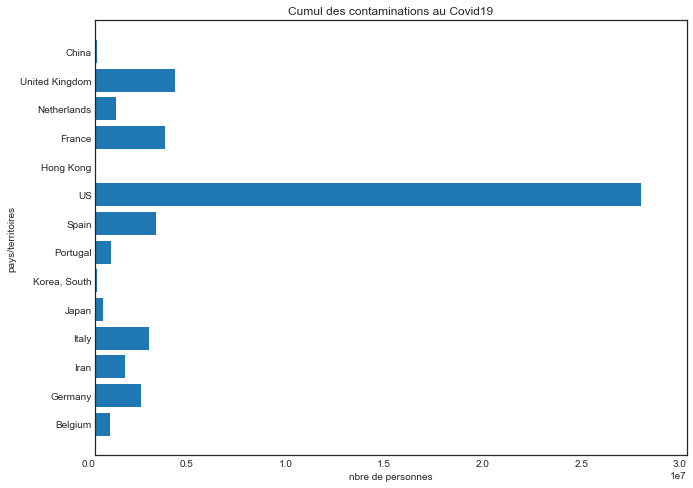

In [26]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(10.6,8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, horizontalalignment='right')
ax.set(xlim=[0, 30000000], xlabel='nbre de personnes', ylabel='pays/territoires',
       title='Total des contaminations au Covid19')

For publications that use the data, please cite the following publication: "Dong E, Du H, Gardner L. An interactive web-based dashboard to track COVID-19 in real time. Lancet Inf Dis. 20(5):533-534. doi: 10.1016/S1473-3099(20)30120-1"

https://github.com/CSSEGISandData/COVID-19/blob/master/README.md